In [1]:
from models.grad_cam import CNN_grad_cam
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils import data


In [2]:
mean0 =torch.tensor([0.5832, 0.5832, 0.5832])
std0  =torch.tensor([0.1413, 0.1413, 0.1413])
std_normalise_0 = transforms.Normalize(
    mean=mean0,
    std=std0
)

trans0 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_0
])

In [3]:
data_for_grad_cam = torchvision.datasets.ImageFolder('archive/chest_xray/img_for_saliency', transform=trans0)
dataloader_grad_cam = data.DataLoader(data_for_grad_cam, shuffle=False, batch_size=1)

### Download the model from:

In [11]:
model_trained = torch.load('models/20_model.pth')

In [14]:
test_grad_cam = CNN_grad_cam(model_trained)

In [15]:
from models.grad_cam import display_datasets_heatmap

0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1


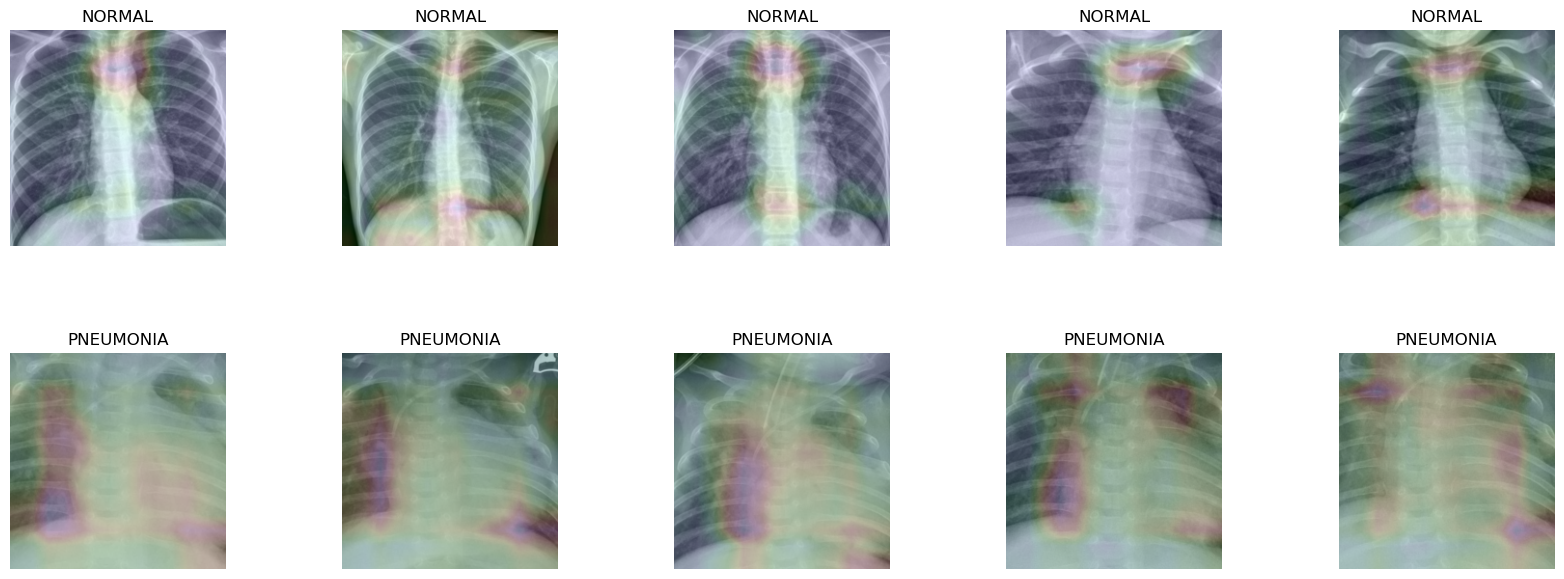

In [19]:
display_datasets_heatmap(test_grad_cam, dataloader_grad_cam, threshold=0)